
# Decision Tree
in this tutorial we learn a Decision Tree from the SFNY dataset using scikit-learn


In [3]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# To enable the matplotlib outputs to be shown directly on this page
%matplotlib inline

# numpy
# https://docs.scipy.org/doc/numpy-1.13.0/reference/
import numpy as np

# matplotlib
# https://matplotlib.org/
import matplotlib.pyplot as plt

# graphviz
# http://www.graphviz.org/
import graphviz
# graphviz executables
# we add the classpath to graphviz binaries to the system classpath
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'

# pandas
# https://pandas.pydata.org/pandas-docs/
import pandas as pd

# sckit-learn 
# http://scikit-learn.org/
# Machine Learning in Python
from sklearn import tree

In [6]:
np_data = np.genfromtxt('/content/drive/MyDrive/Decision Tree/SFNY.csv', delimiter=',',skip_header=1,dtype=np.int32)
np_data

array([[   0,    2,    1, ..., 1000,  999,   10],
       [   0,    2,    2, ..., 1418, 1939,    0],
       [   0,    2,    2, ..., 2150,  628,    9],
       ...,
       [   1,    3,    2, ..., 1483, 1113,  106],
       [   1,    1,    1, ...,  850,  764,  163],
       [   1,    3,    2, ..., 1305,  762,  216]], dtype=int32)

In [7]:
target=np_data[::,0]

In [8]:
features=np_data[::,1::]

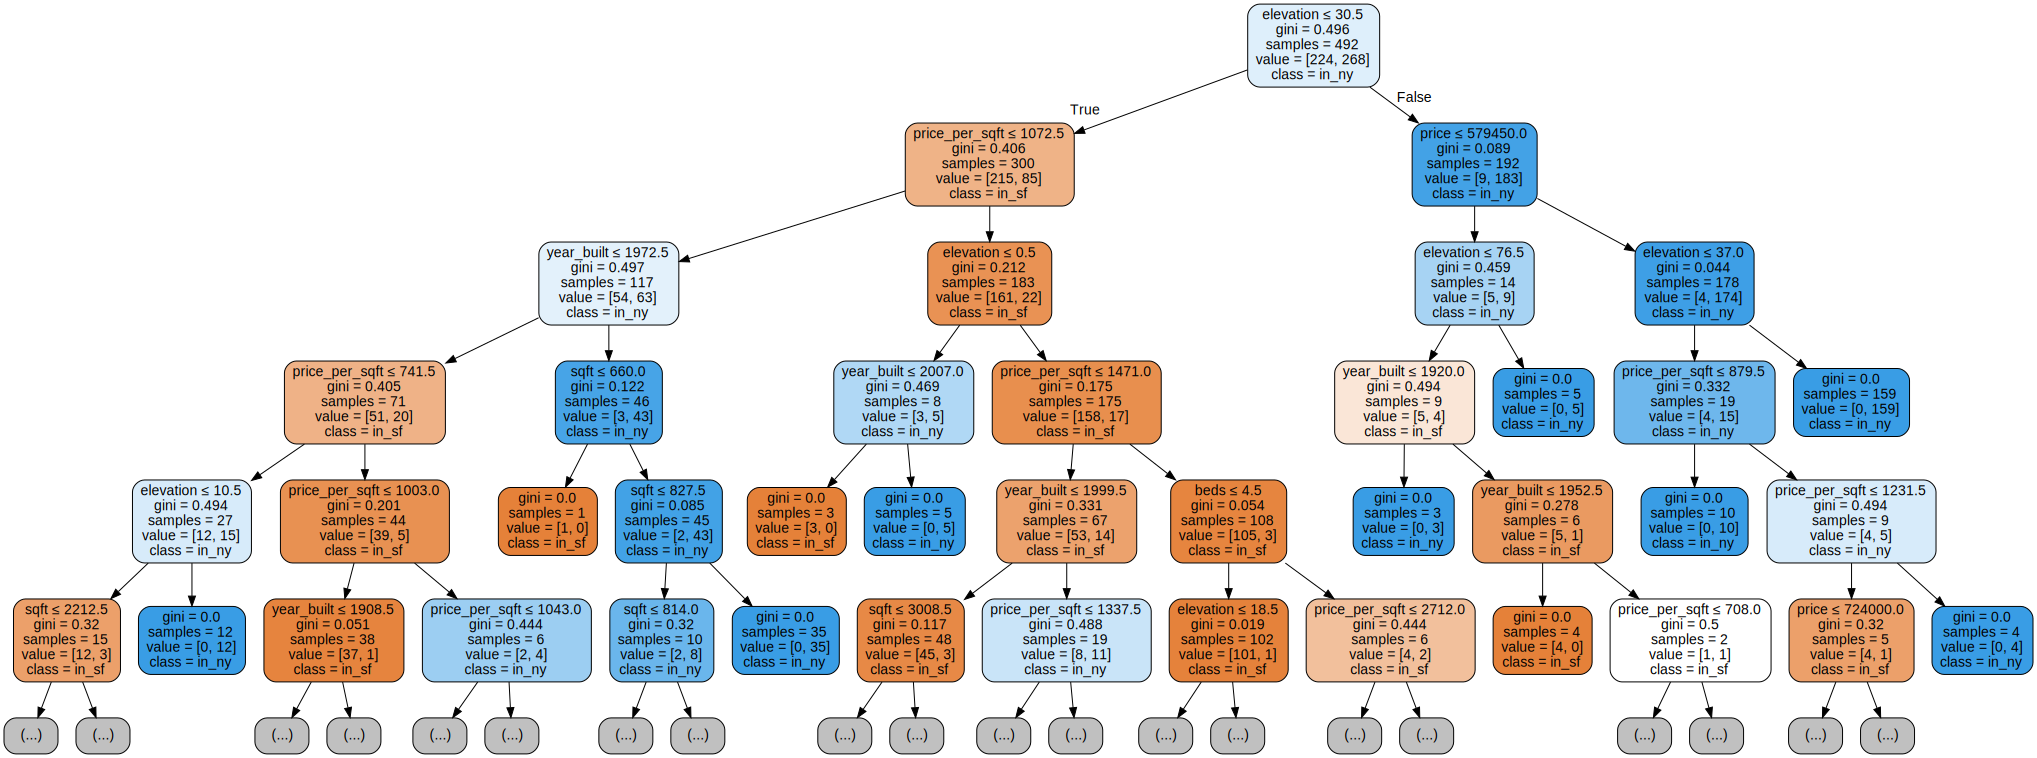

In [9]:
# train the decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, target)

# create a graph representation of the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['beds','bath','price','year_built','sqft','price_per_sqft','elevation'],  
                         class_names=['in_sf','in_ny'],  
                         filled=True, rounded=True,  
                         special_characters=True,max_depth=5
                         )  
graph = graphviz.Source(dot_data) 

# render the graph representation as a pdf
graph.render("SFNY")
graph


In [10]:
# test the decision tree
#clf.predict(iris.data[:1, :])
clf.predict([[3,3,2095000,1926,2200,952,4]])

array([0], dtype=int32)

# Gini Impurity vs Entropy


$$\mathit{Gini}(D) = 1 - \sum_{j=1}^{c}p_j^2$$
$$ \mathit{Entropy}(D) = -\sum_{j=1}^{c}p_j\log p_j$$

In [11]:
dataframe = pd.DataFrame({ 'in_sf' : target,
                           'beds'  : features[::,0],
                           'bath'  : features[::,1],
                           'price' : features[::,2],
                           'year_built' :features[::,3] ,
                           'sqft' : features[::,4], 
                           'price_per_sqft': features[::,5],
                           'elevation' : features[::,6]
                         })

In [13]:
dataframe

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2,1,999000,1960,1000,999,10
1,0,2,2,2750000,2006,1418,1939,0
2,0,2,2,1350000,1900,2150,628,9
3,0,1,1,629000,1903,500,1258,9
4,0,0,1,439000,1930,500,878,10
...,...,...,...,...,...,...,...,...
487,1,5,2,1800000,1890,3073,586,76
488,1,2,1,695000,1923,1045,665,106
489,1,3,2,1650000,1922,1483,1113,106
490,1,1,1,649000,1983,850,764,163
